<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice.png' width=300/></center>

# 데이터프레임 변경 (1)

1) pandas 라이브러리를 불러오세요.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

2) 다음 경로의 파일을 읽어 titanic 데이터프레임을 만드세요.

- 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/titanic.csv'

**[titanic 데이터 셋 정보]**

- Survived: 생존여부(1=Yes, 0=No)
- Pclass: 객실등급(1=1st, 2=2nd, 3=3rd)
- Sex: 성별(male, female)
- Age: 나이
- Sibsp: 탑승한 형제자매, 배우자 수
- Parch: 탑승한 자녀, 부모 수
- Ticket: 티켓 번호
- Fare: 요금
- Cabin: 캐빈 번호
- Embarked: 출발한 항구((C=Cherbourg, Q=Queenstown, S=Southampton)

In [2]:
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/titanic.csv'
titanic = pd.read_csv(path)

3) 상위 5개 행을 확인하세요.

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


4) 다음 요구사항에 맞게 순서대로 구문을 작성하고 확인하세요.

- 4-1) PassengerId, Name, Ticket, Cabin 열을 한 번에 삭제하세요.
- 4-2) Sex 열 이름을 Male로 변경하세요.
- 4-3) Male 열 값을 'male'은 1, 'female'은 0으로 변경하세요.
- 4-4) SibSp 열과 Parch 열의 값을 더한 결과를 갖는 Family 열을 추가하세요.
- 4-5) SibSp, Parch 두 열을 삭제하세요.
- 4-6) 결과를 확인하세요.

In [6]:
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True, axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
titanic.rename(columns={'Sex':'Male'}, inplace=True)
titanic.head()

,Survived,Pclass,Male,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
titanic['Male'] = titanic['Male'].replace({'male':1, 'female':0})
titanic.head()

,Survived,Pclass,Male,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [10]:
#4-4) SibSp 열과 Parch 열의 값을 더한 결과를 갖는 Family 열을 추가하세요.
titanic['Family'] = titanic['SibSp'] + titanic['Parch']
titanic.head()

,Survived,Pclass,Male,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,1,22.0,1,0,7.2500,S,1
1,1,1,0,38.0,1,0,71.2833,C,1
2,1,3,0,26.0,0,0,7.9250,S,0
3,1,1,0,35.0,1,0,53.1000,S,1
4,0,3,1,35.0,0,0,8.0500,S,0


In [11]:
#4-5) SibSp, Parch 두 열을 삭제하세요.
titanic.drop(['SibSp', 'Parch'], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Male,Age,Fare,Embarked,Family
0,0,3,1,22.0,7.2500,S,1
1,1,1,0,38.0,71.2833,C,1
2,1,3,0,26.0,7.9250,S,0
3,1,1,0,35.0,53.1000,S,1
4,0,3,1,35.0,8.0500,S,0


5) 다음 요구사항에 맞게 순서대로 구문을 작성하고 확인하세요.

- 5-1) 기술통계 정보에서 Age 열의 25%, 50%, 75% 값을 조회해 q1, q2, q3 변수를 선언하세요.
- 5-2) 아래 범위와 값을 참조해 'a' ~ 'd' 값을 갖는 AgeGrp 열을 추가하세요.
    - q1 이하 → 'a'
    - q1 초과 q2 이하 → 'b'
    - q2 초과 q3 이하 → 'c'
    - q3 초과 → 'd'
- 5-3) AgeGrp 별 생존율을 집계하여 tmp 데이터프레임을 선언하세요.
- 5-4) tmp 데이터프레임을 막대그래프로 시각화해 확인하세요.

In [14]:
q1 = titanic['Age'].describe()['25%']
q2 = titanic['Age'].describe()['50%']
q3 = titanic['Age'].describe()['75%']

In [15]:
bin = [-np.inf, q1, q2, q3, np.inf]
titanic['AgeGrp'] = pd.cut(titanic['Age'], bins=bin, labels=list('abcd'))
titanic.head()

,Survived,Pclass,Male,Age,Fare,Embarked,Family,AgeGrp
0,0,3,1,22.0,7.2500,S,1,b
1,1,1,0,38.0,71.2833,C,1,c
2,1,3,0,26.0,7.9250,S,0,b
3,1,1,0,35.0,53.1000,S,1,c
4,0,3,1,35.0,8.0500,S,0,c


In [17]:
titanic['AgeGrp'].value_counts()

b    183
a    179
d    177
c    175
Name: AgeGrp, dtype: int64

In [20]:
tmp = titanic.groupby('AgeGrp', as_index=False)[['Survived']].mean()
tmp

,AgeGrp,Survived
0,a,0.458101
1,b,0.360656
2,c,0.434286
3,d,0.372881


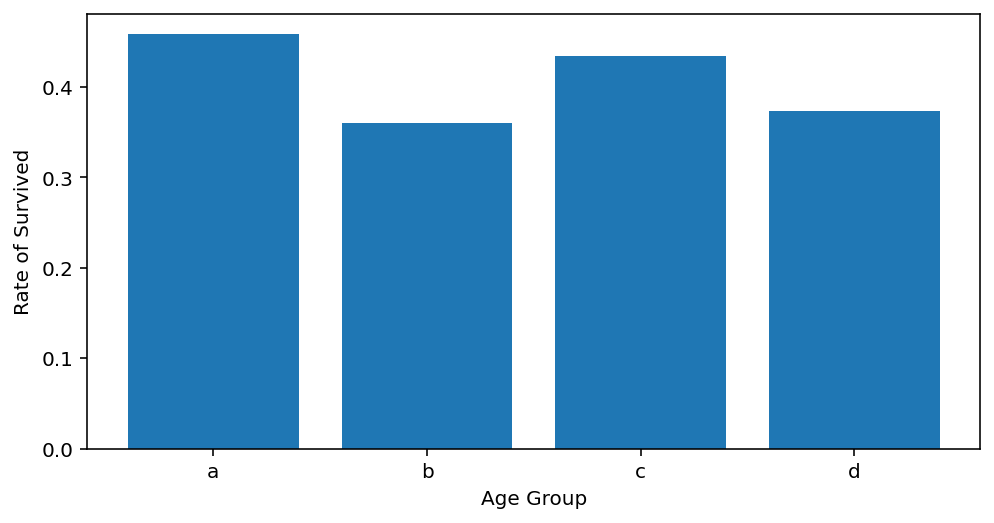

In [26]:
plt.figure(figsize=(8, 4))
plt.bar(tmp['AgeGrp'], tmp['Survived'])
plt.xlabel('Age Group')
plt.ylabel('Rate of Survived')
plt.show()